# (Ir-)Relevant Feature Invariance Results

In [1]:
from lib_project.notebook import setup_notebook
setup_notebook("../../")

%load_ext autoreload
%autoreload 2

In [7]:
from pathlib import Path

from IPython.display import display, Markdown as md

from lib_vision.visualization.images import show_dataset_samples
from experiments.irrelevant_feature_extraction.data import (
    IFEDataConfig,
    create_irrelevant_features_dataset,
)
from experiments.irrelevant_feature_extraction import results as res_util

In [ ]:
PLOTS_DIR = Path("../figures/how_important")

## Dataset visualization

CIFAR-10 backgrounds overlayed with 2D objects, and only objects.

Mixed samples:


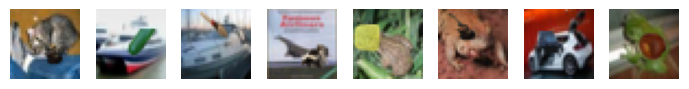

Objects only:


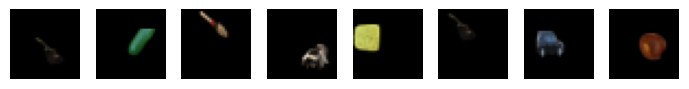

In [8]:
n_samples = 8
ife_datasets = create_irrelevant_features_dataset(
    IFEDataConfig(
        config_seed=694,
        n_classes=10,
        sampling_seed=538,
        transforms_sampling_seed=None,
        img_size=32,
        n_training_samples=n_samples,
        n_val_samples=n_samples,
        n_test_samples=n_samples,
        batch_size=n_samples,
    ),
    transform_names=["translate"],
    normalize=False,
)
figsize=(7, 1)
show_titles = False
print("Mixed samples:")
cifar_objects_fig = show_dataset_samples(
    ife_datasets.datasets["cifar_mixed_cor0.0"],
    n_samples,
    "test",
    figsize=figsize,
    show_titles=show_titles,
)
print("Objects only:")
objects_only_fig = show_dataset_samples(
    ife_datasets.datasets["objects_only"],
    n_samples,
    "test",
    figsize=figsize,
    show_titles=show_titles,
)

In [ ]:
ife_examples_dir = PLOTS_DIR / "appendix_ife_examples"
# cifar_only_fig.savefig(ife_examples_dir / "ife_cifar_only_samples.pdf")
cifar_objects_fig.savefig(ife_examples_dir / "ife_cifar_objects_samples.pdf")
objects_only_fig.savefig(ife_examples_dir / "ife_objects_only_samples.pdf")

## Evaluation

There are the following models:

- the "cifar_only" model is trained on the vanilla CIFAR dataset
- the "mixed_cifar_labels" model is trained on the CIFAR dataset with objects pasted on it, with the goal of predicting the CIFAR label
- the "mixed_object_labels" model is trained on the CIFAR dataset with objects, with the goal of predicting the object types.
- the "objects_only" model is trained only on the Transforms-2D objects.

All are fine-tuned and evaluated on all four  for both the task of predicting CIFAR and object labels.

## Resnet 18, fixed object positions

In [17]:
results_fixed = res_util.load("rn18_fixed", list(range(10)))
# res_util.show_results(results_fixed)

In [20]:
transfer_perf = res_util.combine_seed_results(results_fixed)
# print("Mean:")
means = transfer_perf.mean(axis=1)
# display(means)
# print("Std:")
stds = transfer_perf.std(axis=1)
# display(stds)

# Print the invariance results as a Latex table
res_util.print_comp_table(means, stds)

& C & C & $0.98_{\pm 0.00}$ & $0.95_{\pm 0.00}$ & $0.80_{\pm 0.04}$ & $1.00_{\pm 0.00}$ \\
& C + O & C & $0.98_{\pm 0.00}$ & $0.98_{\pm 0.00}$ & $0.53_{\pm 0.05}$ & $1.00_{\pm 0.00}$ \\
& C + O & O & $0.31_{\pm 0.02}$ & $0.24_{\pm 0.02}$ & $1.00_{\pm 0.00}$ & $1.00_{\pm 0.00}$ \\
& O & O & $0.36_{\pm 0.01}$ & $0.35_{\pm 0.01}$ & $0.85_{\pm 0.05}$ & $1.00_{\pm 0.00}$ \\


### Invariance correlations

In [15]:
res_util.print_invariances(results_fixed)

Mean invariances:


Model,cifar,objects
cifar_only,0.993504,0.210527
cifar_mixed,1.000606,0.077509
objects_mixed,0.112317,0.988348
objects_only,0.981287,0.192622


Standard deviation of invariances:


Model,cifar,objects
cifar_only,0.003342,0.013594
cifar_mixed,0.003494,0.003475
objects_mixed,0.040304,0.005490
objects_only,0.012066,0.072071


& C & C & $0.99_{\pm 0.00}$ & $0.21_{\pm 0.01}$ \\
& C + O & C & $1.00_{\pm 0.00}$ & $0.08_{\pm 0.00}$ \\
& C + O & O & $0.11_{\pm 0.04}$ & $0.99_{\pm 0.01}$ \\
& O & O & $0.98_{\pm 0.01}$ & $0.19_{\pm 0.07}$ \\
Correlation between invariances and performance:
CIFAR correlation: 0.6809988237007445
Objects correlation: 0.7856025309439806


## ResNet-18, translated object positions

In [21]:
results_translate = res_util.load("rn18_translate", list(range(10)))
# res_util.show_results(results_translate)

In [22]:
transfer_perf = res_util.combine_seed_results(results_translate)
# print("Mean:")
means = transfer_perf.mean(axis=1)
# display(means)
# print("Std:")
stds = transfer_perf.std(axis=1)
# display(stds)

# Print the invariance results as a Latex table
res_util.print_comp_table(means, stds)

& C & C & $0.98_{\pm 0.00}$ & $0.89_{\pm 0.01}$ & $0.56_{\pm 0.06}$ & $1.00_{\pm 0.00}$ \\
& C + O & C & $0.98_{\pm 0.00}$ & $0.97_{\pm 0.00}$ & $0.15_{\pm 0.01}$ & $1.00_{\pm 0.00}$ \\
& C + O & O & $0.26_{\pm 0.02}$ & $0.13_{\pm 0.02}$ & $1.00_{\pm 0.00}$ & $0.98_{\pm 0.02}$ \\
& O & O & $0.29_{\pm 0.03}$ & $0.28_{\pm 0.03}$ & $0.25_{\pm 0.04}$ & $1.00_{\pm 0.00}$ \\


In [23]:
res_util.print_invariances(results_translate)

Mean invariances:


Model,cifar,objects
cifar_only,0.993248,0.209403
cifar_mixed,1.000486,0.083511
objects_mixed,0.130486,0.986842
objects_only,0.998399,0.105614


Standard deviation of invariances:


Model,cifar,objects
cifar_only,0.003838,0.016215
cifar_mixed,0.003330,0.006740
objects_mixed,0.024909,0.005339
objects_only,0.008540,0.043490


& C & C & $0.99_{\pm 0.00}$ & $0.21_{\pm 0.02}$ \\
& C + O & C & $1.00_{\pm 0.00}$ & $0.08_{\pm 0.01}$ \\
& C + O & O & $0.13_{\pm 0.02}$ & $0.99_{\pm 0.01}$ \\
& O & O & $1.00_{\pm 0.01}$ & $0.11_{\pm 0.04}$ \\
Correlation between invariances and performance:
CIFAR correlation: 0.6834370203877072
Objects correlation: 0.9397484013129577


## Resnet 18, large data, with correlations

In [ ]:
seeds = list(range(10))
results = res_util.load("obj2d_resnet-18", seeds)
# summary = res_util.summarize(results)
# for transform_name, transform_result in summary.items():
#     display(md(f"\n## Results for '{transform_name}':"))
#     res_util.show(transform_result)

In [ ]:
target_transform = "none"
transform_results = [res[target_transform] for res in results]
correlation_figs = res_util.plot_correlation_performance(transform_results)
plt.show()
correlation_figs.cifar_target_perf.savefig(plots_dir_how_learned / "ife_correlation_cifar_perf.pdf")
correlation_figs.objects_target_perf.savefig(plots_dir_how_learned / "ife_correlation_objects_perf.pdf")
# correlation_figs.cifar_rep_dists.savefig(plots_dir_how_learned / "ife_correlation_cifar_rep_dists.pdf")
# correlation_figs.objects_rep_dists.savefig(plots_dir_how_learned / "ife_correlation_objects_rep_dists.pdf")

In [ ]:
### Availability

In [ ]:
seeds = list(SEEDS.values())
results = res_util.load("obj2d_resnet-18", seeds, ["none"])

In [ ]:
target_transform = "none"
transform_results = [res[target_transform] for res in results]
availability_figs = res_util.plot_availability_performance(transform_results)
plt.show()
availability_figs[0].savefig(plots_dir_how_learned / "ife_availability_cifar_perf.pdf")
availability_figs[1].savefig(plots_dir_how_learned / "ife_availability_objects_perf.pdf")